In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("E:\\Notebooks\\train.csv")
df = df.dropna()
df.head()

,x,y
0,24,21.549452
1,50,47.464463
2,15,17.218656
3,38,36.586398
4,87,87.288984


In [29]:
#prediction function
def predict(X, theta):
    #print("Multiplying X and theta. X shape: ", X.shape, " Theta shape: ", theta.shape)
    return np.matmul(X,theta)

In [36]:
def calcCost(errors):
    squared_err = errors*errors
    mse = np.sum(squared_err)/(2*len(errors))
    return mse
    

In [37]:
def gradientDescent(X, Y, learning_rate, iterations):
    theta = np.zeros(X.shape[1])
    theta = theta.reshape(2,1)
    costs = []
    for i in range(0, iterations):
        predicted = predict(X, theta)
        #print("Prediction shape", predicted.shape)
        errors = predicted - Y
        costs.append(calcCost(errors))
        #print("Error shape: ", errors.shape)
        #print("X shape: ", X.T.shape)
        gradient = (1/len(Y))*np.matmul(X.T, errors)
        #print("Gradient Shape ", gradient, gradient.shape)
        theta = theta - learning_rate*gradient
        #print("New theta:  ", theta)
    return theta, costs
    

In [58]:
#Start training

X = df['x']
Y = df['y']

bias = np.ones(len(X))
bias = pd.Series(bias)
X = pd.merge(bias.to_frame(), X.to_frame(), left_index=True, right_index=True)
X = np.array(X)

Y = np.array(Y)
Y = Y.reshape(len(Y),1)

# theta = np.zeros(X.shape[1])
# theta = theta.reshape(2,1)

# print("Theta shape: ", theta.shape)
print("X shape: ", X.shape)
print("Y shape: ", Y.shape)

learning_rate = 0.000005 #the less is the learning rate is, the less steep the cost curve will be. That means we will slowly move towards the minimum
iterations = 1500
theta, costs = gradientDescent(X, Y, learning_rate, iterations)
print("Final theta ", theta)

X shape:  (99, 2)
Y shape:  (99, 1)
Final theta  [[0.01769622]
 [0.99782386]]


Text(0, 0.5, 'Cost')

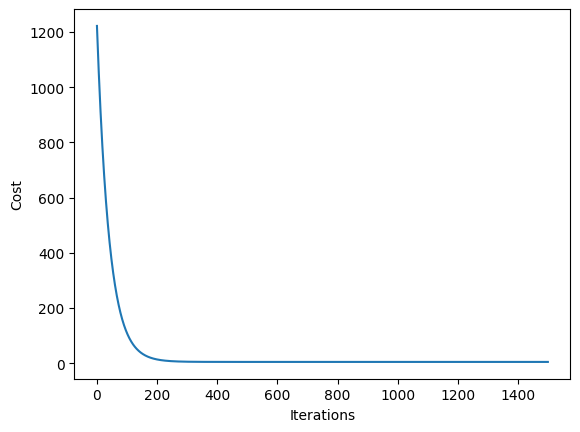

In [59]:
#Plot cost graph
plt.plot(costs, label='Cost')
plt.xlabel(xlabel = "Iterations")
plt.ylabel(ylabel = "Cost")